## Observations and Insights 

The present document shows the undesirable effect of the drug Capomulin as a treatment for squamous cell carcinoma (SCC) concerning other therapies. For this, a study was carried out with 249 laboratory mice identified with this SCC tumor’s growth.

In 45 days, the tumor growth was performed and measured in these mice. Analysis groups were conducted to compare Capomuliin with other treatments. There is also a control group (Placebo) to identify Capmulin and the different treatments’ performance.

The performance of this drug was scored based on survival and tumor shrinkage. As shown in the figure “Summary: Number of mice per drug regimen over time,” the Capomulon and Racomilin treatments are the only treatments where the number of mice throughout the analysis period is greater than the control group. In the Capomulin group, 84% of mice survived (Ramicase 80% survived).
Likewise, concerning tumor reduction, better performance is observed in the Capomulin and Regimen treatments, as shown in the figure Summary: Average tumor volume per drug Acroos Timepoint Regimen, in relation to the control group. With the Caomulin treatment on average, the tumor volume was reduced by 19.47%; also, the Ramicane group treated with this drug showed a 22.32% reduction.

In general, in the group treated with Capomulin, a decrease in volume is observed; it also has a higher survival number. Considering these two factors, Capomulin is the best performing drug. The biggest competitor is Racimcane, with a behavior similar to Capomulin.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
PharmaStudyData=pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID' )


#Set the Drug of Interest
DrugOfInterest='Capomulin'
GroupOfControl='Placebo'  #To help visualitation of data

#Dict for the boxplot
square = dict(markerfacecolor='black', marker='s')


#Set instructions for boxplot
InstrutionsSet=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [2]:
# Checking the number of mice in the DataFrame.
BeforeClean=pd.DataFrame(PharmaStudyData.groupby(['Timepoint'])['Mouse ID'].count())



In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
DuplicateMice=PharmaStudyData.loc[PharmaStudyData[['Mouse ID','Timepoint','Drug Regimen']].duplicated(keep='first')]
DuplicateMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
PharmaStudyData=PharmaStudyData.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first', inplace=False)


In [5]:
MiceInStudyData=PharmaStudyData.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False)
MiceInStudyData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [6]:

#Set Frames to use for the analysis

#For Drug Regimen across Timepoint
DrugName=[name for name in PharmaStudyData['Drug Regimen'].unique()]

FramesByDrug=[]
for name in DrugName:
    FramesByDrug.append(PharmaStudyData.loc[lambda PharmaStudyData:PharmaStudyData['Drug Regimen']==name])

#For Timepoint across Drug Regimen
TimePoint=[time for time in PharmaStudyData['Timepoint'].unique()]

FramesByTime=[]
for time in TimePoint:
    FramesByTime.append(PharmaStudyData.loc[lambda PharmaStudyData:PharmaStudyData['Timepoint']==time])
    

In [7]:
# Checking the number of mice in the clean DataFrame.
AfterClean=pd.DataFrame(PharmaStudyData.groupby(['Timepoint'])['Mouse ID'].count())
Compare=pd.merge(BeforeClean, AfterClean, how='outer', on='Timepoint', suffixes=("_Before","_After") )
Compare['Change']=Compare['Mouse ID_After']-Compare['Mouse ID_Before']
Compare

,Mouse ID_Before,Mouse ID_After,Change
Timepoint,,,
0,250,249,-1
5,238,237,-1
10,223,222,-1
15,207,206,-1
20,195,194,-1
25,183,183,0
30,171,171,0
35,154,154,0
40,142,142,0


In [8]:
pd.DataFrame({'Total':PharmaStudyData['Mouse ID'].nunique()}, index=['Mice'])


,Total
Mice,249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Set Summary with the following code to have Drug Regimen and Timepoint using dict and DataFrame
SummaryDrugRegimen=[]
for drug in range(len(DrugName)):
    name=DrugName[drug]
    count=FramesByDrug[drug].groupby(['Timepoint'])['Tumor Volume (mm3)'].count()
    mean=FramesByDrug[drug].groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()
    median=FramesByDrug[drug].groupby(['Timepoint'])['Tumor Volume (mm3)'].median()
    var=FramesByDrug[drug].groupby(['Timepoint'])['Tumor Volume (mm3)'].var()
    std=FramesByDrug[drug].groupby(['Timepoint'])['Tumor Volume (mm3)'].std()
    sem=FramesByDrug[drug].groupby(['Timepoint'])['Tumor Volume (mm3)'].sem()
    SummaryDrugRegimen.append(pd.DataFrame({
        'Drug Regimen':name,
        'Mice count':count,
        'Tumor volumen average':mean,
        'Tumor volumen median':median,
        'Tumor volumen var':var,
        'Tumor volumen std':std,
        'Tumor volumen sem':sem
        }))
    
SummaryDrugRegimen[1] #Show the result of the Drug of Interest using the first method code



,Drug Regimen,Mice count,Tumor volumen average,Tumor volumen median,Tumor volumen var,Tumor volumen std,Tumor volumen sem
Timepoint,,,,,,,
0,Capomulin,25,45.000000,45.000000,0.000000,0.000000,0.000000
5,Capomulin,25,44.266086,45.597064,5.030889,2.242964,0.448593
10,Capomulin,25,43.084291,43.421014,12.344133,3.513422,0.702684
15,Capomulin,24,42.064317,42.798160,16.878693,4.108369,0.838617
20,Capomulin,23,40.716325,40.716428,19.035028,4.362915,0.909731
25,Capomulin,22,39.939528,40.224165,17.100444,4.135268,0.881642
30,Capomulin,22,38.769339,39.260371,19.210721,4.383004,0.934460
35,Capomulin,22,37.816839,38.360455,24.358640,4.935447,1.052241
40,Capomulin,21,36.958001,36.843898,31.441568,5.607278,1.223608


In [10]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Set Summary with the following code to have Drug Regimen and Timepoint using .agg() method
StatistcsDrugRegime=[]
for drug in range(len(DrugName)):
    Summary=FramesByDrug[drug].groupby(['Timepoint']).agg(['count','mean','median','var','std','sem'])["Tumor Volume (mm3)"]
    StatistcsDrugRegime.append(Summary)

StatistcsDrugRegime[1] #Show the result of the Drug of Interest using the scond method code


,count,mean,median,var,std,sem
Timepoint,,,,,,
0,25,45.000000,45.000000,0.000000,0.000000,0.000000
5,25,44.266086,45.597064,5.030889,2.242964,0.448593
10,25,43.084291,43.421014,12.344133,3.513422,0.702684
15,24,42.064317,42.798160,16.878693,4.108369,0.838617
20,23,40.716325,40.716428,19.035028,4.362915,0.909731
25,22,39.939528,40.224165,17.100444,4.135268,0.881642
30,22,38.769339,39.260371,19.210721,4.383004,0.934460
35,22,37.816839,38.360455,24.358640,4.935447,1.052241
40,21,36.958001,36.843898,31.441568,5.607278,1.223608


### Summary graphs of number of mice and tumor volume


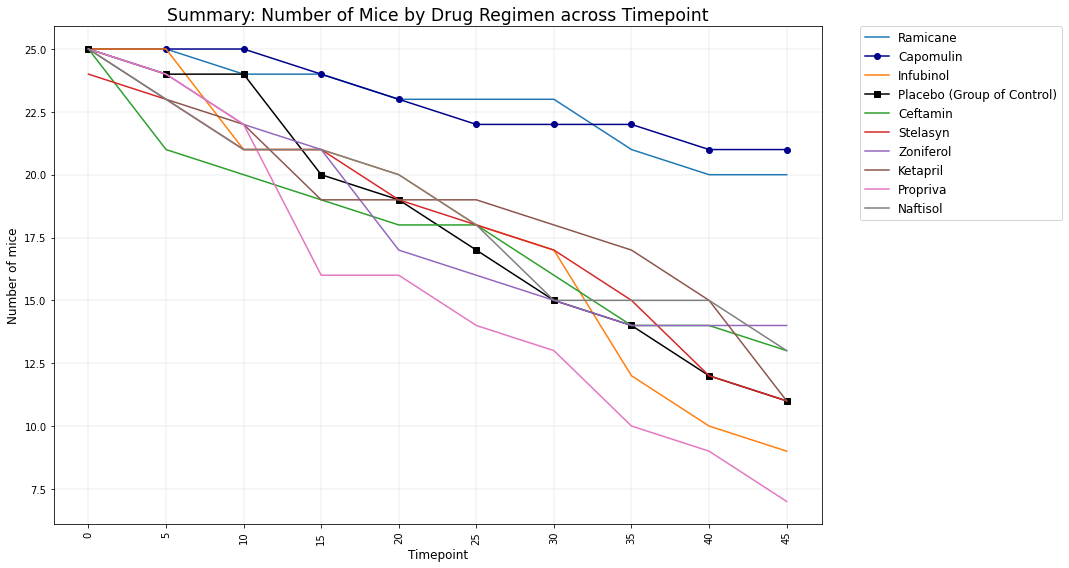

In [11]:
#To help the analysis is included the a Summary Plot. This plot shows the number of mice in each Drug Regimen

fig1=plt.figure(figsize=(15,8), tight_layout=True)

for n in range(len(DrugName)):
    if DrugName[n]==DrugOfInterest:
        plt.plot(TimePoint, SummaryDrugRegimen[n]['Mice count'], marker='o', color='darkblue', label=DrugName[n])
        
    
    elif DrugName[n]==GroupOfControl:
        plt.plot(TimePoint, SummaryDrugRegimen[n]['Mice count'], marker='s', color='black', label=f'{DrugName[n]} (Group of Control)')
            
    
    else:
        plt.plot(TimePoint, SummaryDrugRegimen[n]['Mice count'], label=DrugName[n])
                
plt.title('Summary: Number of Mice by Drug Regimen across Timepoint', fontsize='xx-large')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0., fontsize='large')
plt.grid(lw=0.2)
plt.xticks(TimePoint, rotation='vertical')
plt.ylabel('Number of mice', fontsize='large')
plt.xlabel('Timepoint', fontsize='large')
plt.show()



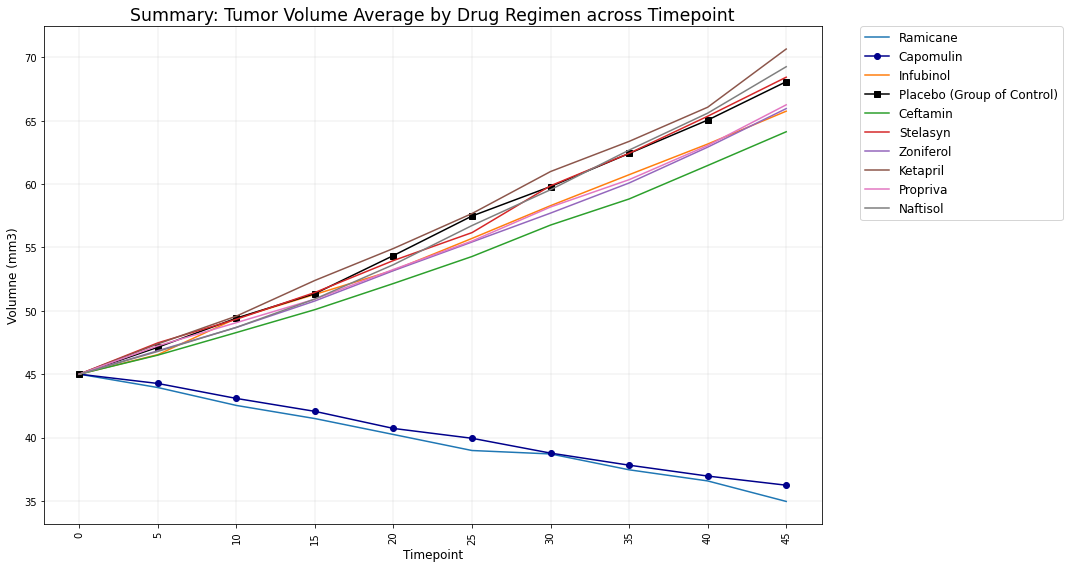

In [12]:
#To help the analysis is included the a Summary Plot. This plot shows the Average of Tumor Volume in each Drug Regimen

fig2=plt.figure(figsize=(15,8), tight_layout=True)

for n in range(len(DrugName)):
    if DrugName[n]==DrugOfInterest:
        plt.plot(TimePoint, SummaryDrugRegimen[n]['Tumor volumen average'], marker='o', color='darkblue', label=DrugName[n])
        
    
    elif DrugName[n]==GroupOfControl:
        plt.plot(TimePoint, SummaryDrugRegimen[n]['Tumor volumen average'], marker='s', color='black', label=f'{DrugName[n]} (Group of Control)')
            
    
    else:
        plt.plot(TimePoint, SummaryDrugRegimen[n]['Tumor volumen average'], label=DrugName[n])
                
plt.title('Summary: Tumor Volume Average by Drug Regimen across Timepoint', fontsize='xx-large')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0., fontsize='large')
plt.grid(lw=0.2)
plt.xticks(TimePoint, rotation='vertical')
plt.ylabel('Volumne (mm3)', fontsize='large')
plt.xlabel('Timepoint', fontsize='large')
plt.show()


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Show the evolution of the Drug Regimen in each Timepoint 
for drug in range(len(DrugName)):
    columns=['Mice count','Tumor volumen average','Tumor volumen median','Tumor volumen var','Tumor volumen sem']
    if DrugName[drug]==DrugOfInterest:
        
        Output=f'''
--------------------------------- Statics for Drug of interest: {DrugName[drug]} ----------------------------------
    
         {SummaryDrugRegimen[drug].to_string(buf=None, index=True, header=True, justify='justify-all', columns=columns)}
        
        '''
    elif DrugName[drug]==GroupOfControl:
         
            Output=f'''
--------------------------------- Statics for Group of Control: {DrugName[drug]} ----------------------------------
    
         {SummaryDrugRegimen[drug].to_string(buf=None, index=True, header=True, justify='justify-all', columns=columns)}
        
        '''   
    
    else:
         Output=f'''
---------------------------------- Statics for Other treatment regimens: {DrugName[drug]} -------------------------
    
         {SummaryDrugRegimen[drug].to_string(buf=None, index=True, header=True, justify='justify-all',columns=columns)}
       
        '''       
    print(Output)
        


---------------------------------- Statics for Other treatment regimens: Ramicane -------------------------
    
                    Mice count  Tumor volumen average  Tumor volumen median  Tumor volumen var  Tumor volumen sem
Timepoint                                                                                               
0                  25              45.000000             45.000000           0.000000           0.000000
5                  25              43.944859             45.521875           5.831150           0.482955
10                 24              42.531957             42.832023          12.449365           0.720225
15                 24              41.495061             41.262007          14.245578           0.770432
20                 23              40.238325             40.772803          14.216521           0.786199
25                 23              38.974300             38.097513          12.833914           0.746991
30                 23              38

## Bar Plots

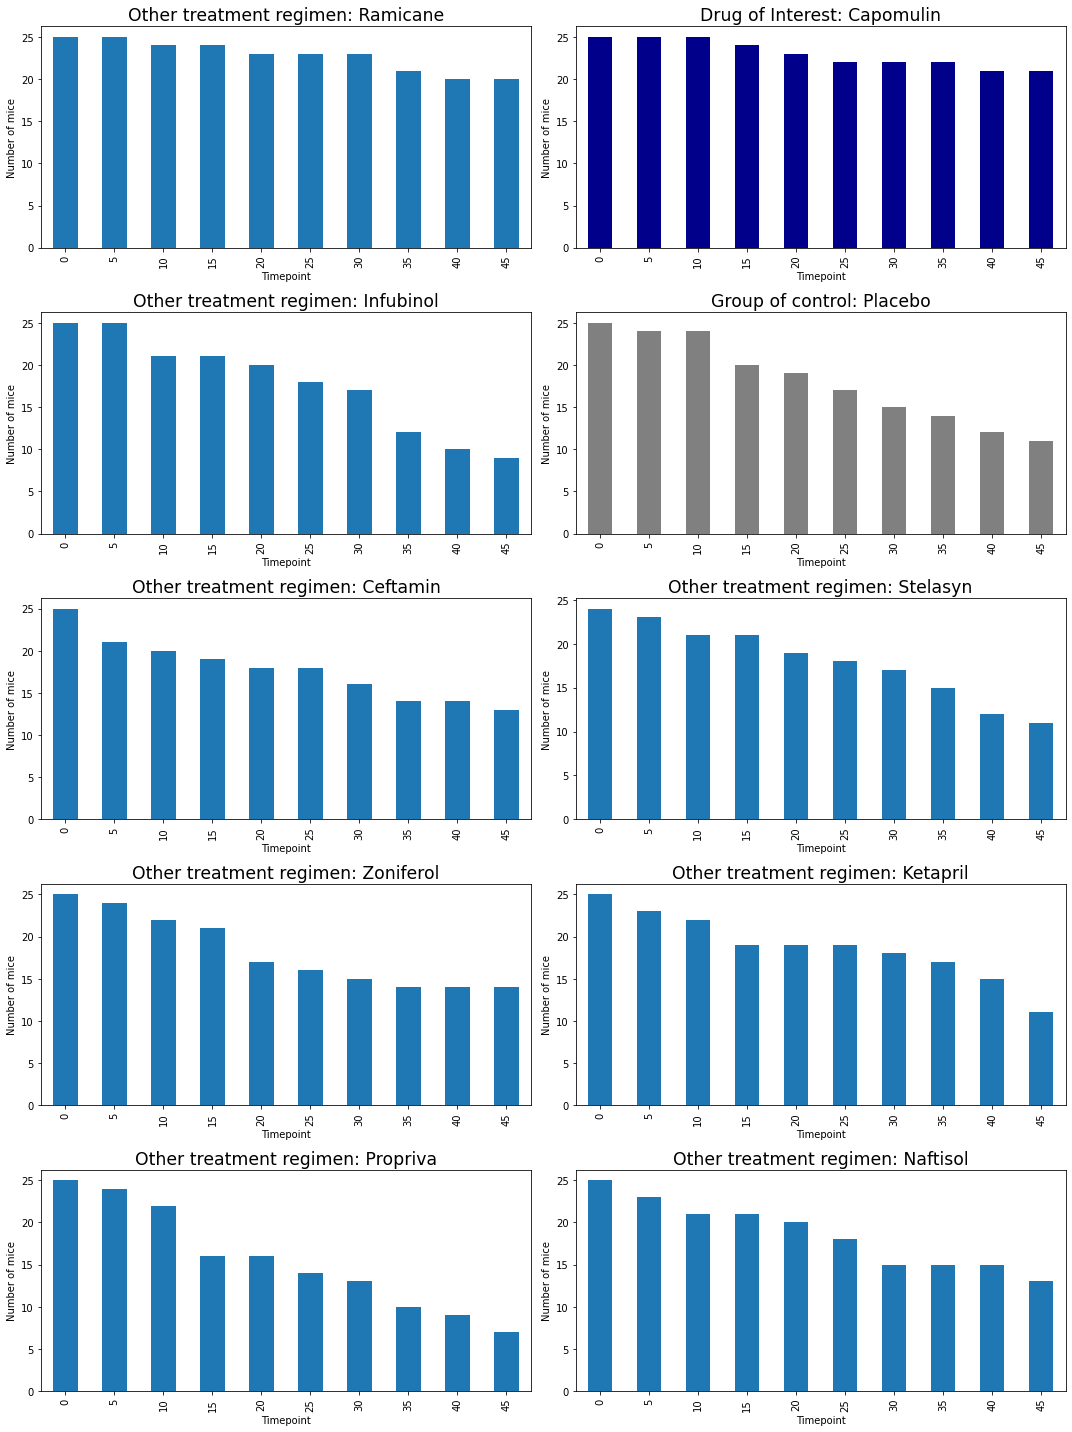

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

fig3=plt.figure(figsize=(15,20), tight_layout=True)

for n in range(len(DrugName)):
    fig3.add_subplot(5,2,n+1)
    if DrugName[n]==DrugOfInterest:
        SummaryDrugRegimen[n]['Mice count'].plot(kind='bar', color='darkblue')
        plt.title(f'Drug of Interest: {DrugName[n]}', fontsize='xx-large')
    
    elif DrugName[n]==GroupOfControl:
        SummaryDrugRegimen[n]['Mice count'].plot(kind='bar', color='grey')
        plt.title(f'Group of control: {DrugName[n]}', fontsize='xx-large')    
    
    else:
        SummaryDrugRegimen[n]['Mice count'].plot(kind='bar')
        plt.title(f'Other treatment regimen: {DrugName[n]}', fontsize='xx-large')        
    plt.ylabel('Number of mice')
    plt.xlabel('Timepoint')

    

plt.show()


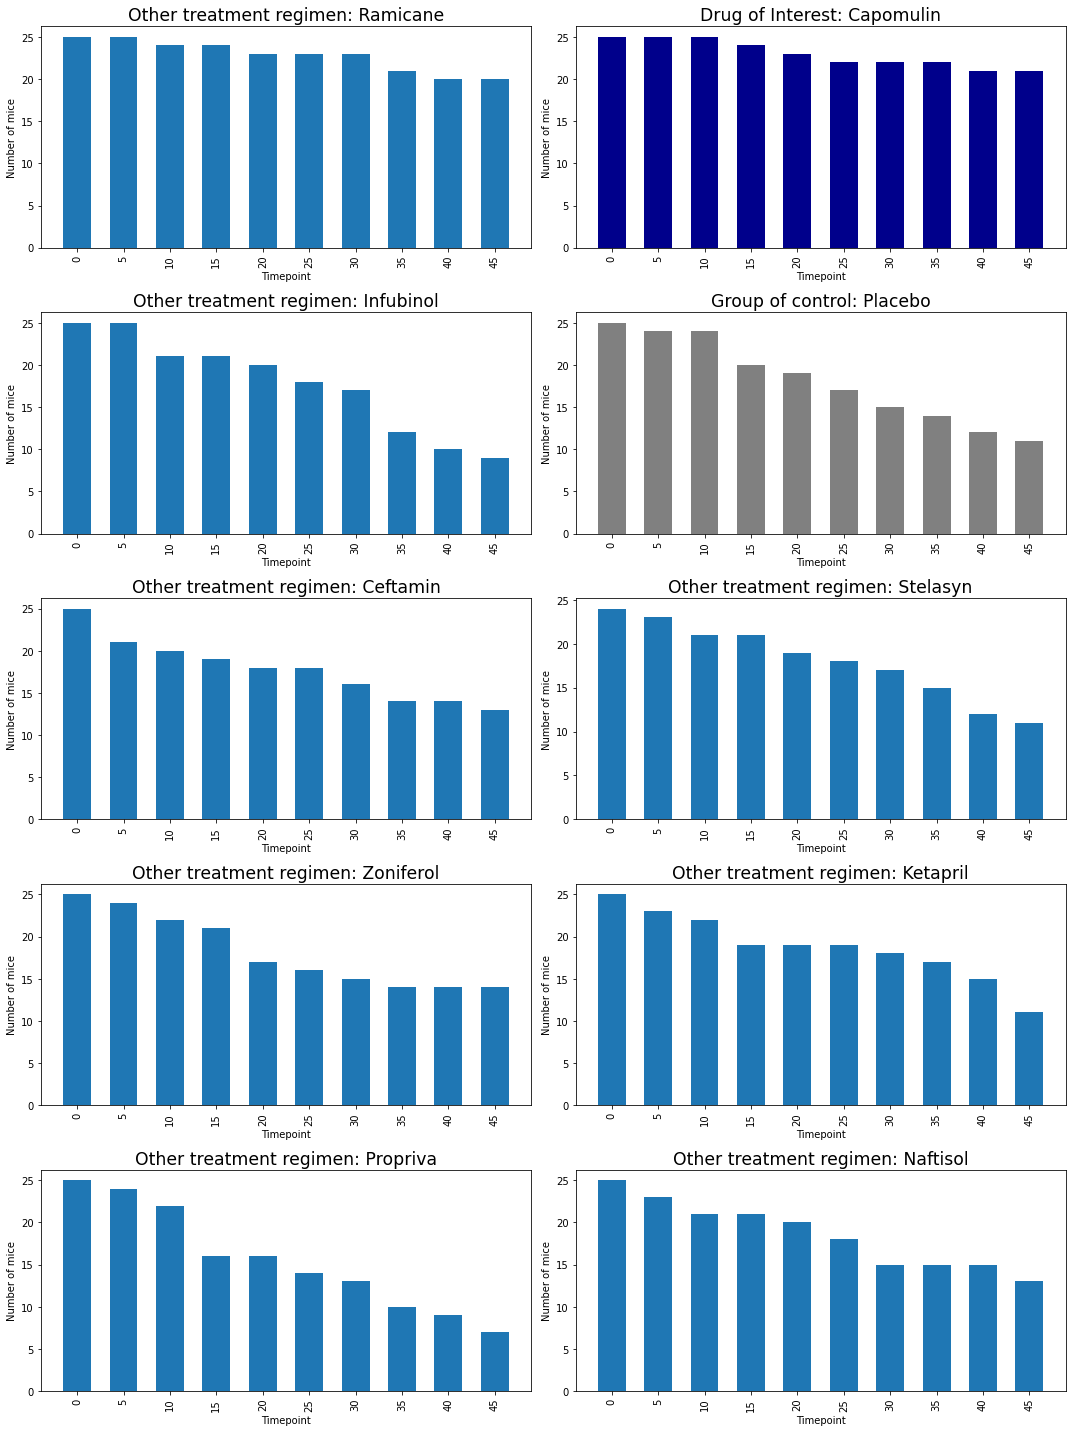

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#For this it was necesary the funtion xticks and the change the propeties of plt.bar()

fig4=plt.figure(figsize=(15,20), tight_layout=True)

for n in range(len(DrugName)):
    fig4.add_subplot(5,2,n+1)
    if DrugName[n]==DrugOfInterest:
        plt.bar(TimePoint, SummaryDrugRegimen[n]['Mice count'], width=3, color='darkblue')
        plt.title(f'Drug of Interest: {DrugName[n]}', fontsize='xx-large')
    
    elif DrugName[n]==GroupOfControl:
        plt.bar(TimePoint, SummaryDrugRegimen[n]['Mice count'], width=3, color='grey')
        plt.title(f'Group of control: {DrugName[n]}', fontsize='xx-large')    
    
    else:
        plt.bar(TimePoint, SummaryDrugRegimen[n]['Mice count'], width=3)
        plt.title(f'Other treatment regimen: {DrugName[n]}', fontsize='xx-large')        
    
    plt.ylabel('Number of mice')
    plt.xlabel('Timepoint')
    plt.xticks(TimePoint, rotation='vertical')
    

plt.show()



## Pie Plots

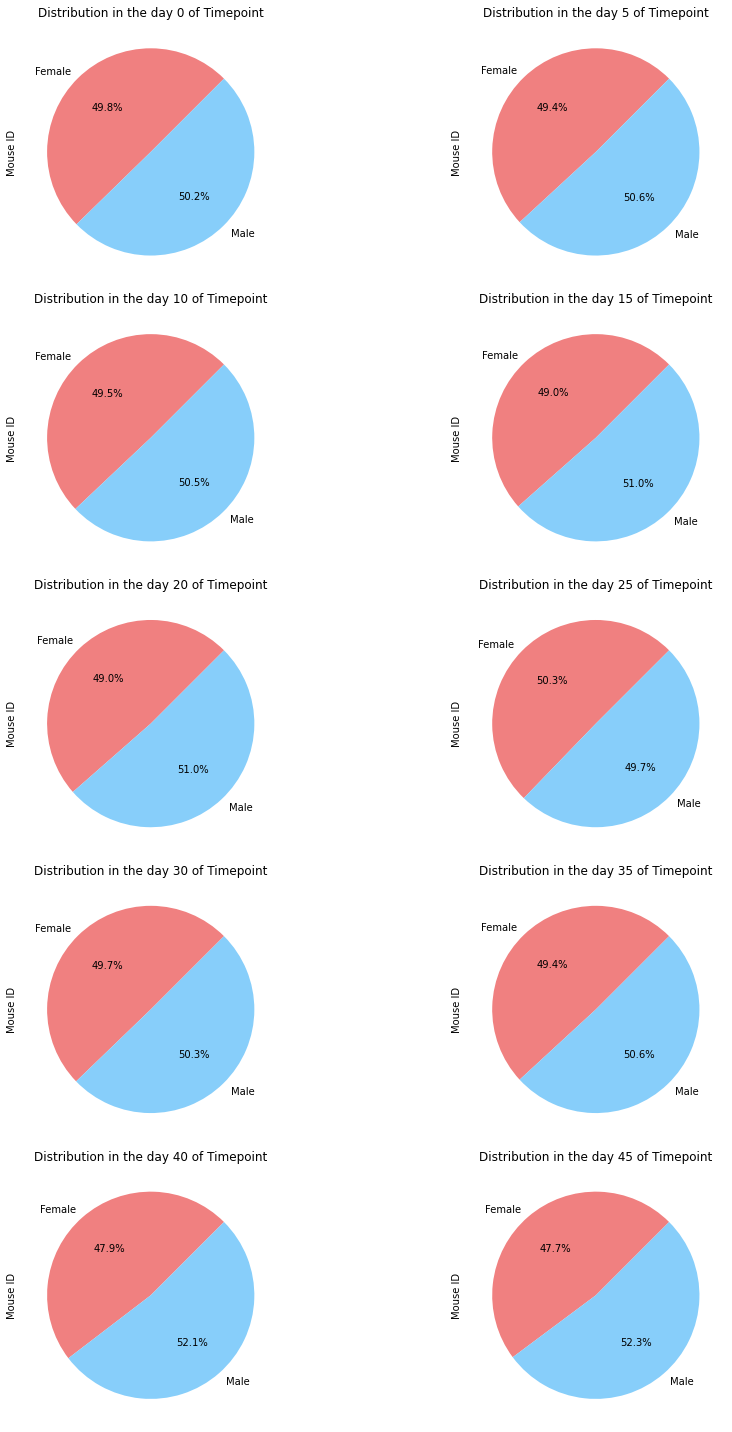

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

fig5=plt.figure(figsize=(15,20), tight_layout=True)
colors = ["lightcoral", "lightskyblue"]

for time in range(len(TimePoint)):
    fig5.add_subplot(5,2,time+1)
    FramesByTime[time].groupby(['Sex'])['Mouse ID'].count().plot(kind='pie', mark_right=False, colors=colors, autopct="%1.1f%%", startangle=45)
    plt.title(f'Distribution in the day {TimePoint[time]} of Timepoint')    

plt.show()



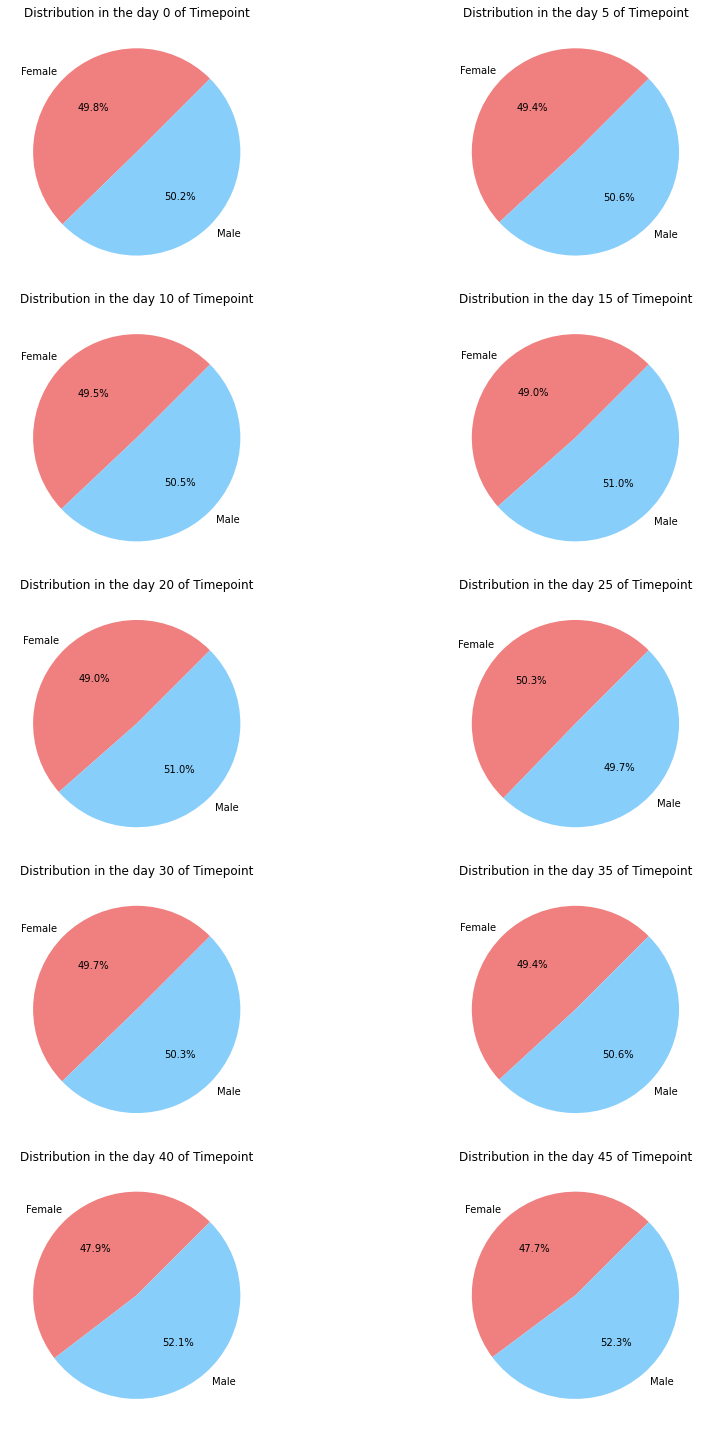

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig6=plt.figure(figsize=(15,20), tight_layout=True)
colors = ["lightcoral", "lightskyblue"]

for time in range(len(TimePoint)):
    fig6.add_subplot(5,2,time+1)
    plt.pie(FramesByTime[time].groupby(['Sex'])['Mouse ID'].count(), colors=colors, autopct="%1.1f%%", startangle=45, labels=['Female','Male'])
    plt.title(f'Distribution in the day {TimePoint[time]} of Timepoint')    
plt.show()





## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [19]:
#Instructions four most proising:  Capomulin, Ramicane, Infubinol, and Ceftamin

InstrutionsIndex=[]
for drug in range(len(InstrutionsSet)):
    for n in range(len(DrugName)):
        if DrugName[n]==InstrutionsSet[drug]:
            InstrutionsIndex.append(n)


In [20]:
#Data to plot for instructions         
           
InstrutionsRegimens=[]
InstrutionsRegimensName=[]
for Int in range(len(InstrutionsIndex)):
    LastPoint=pd.DataFrame(FramesByDrug[InstrutionsIndex[Int]]).drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False)
    InstrutionsRegimens.append(LastPoint['Tumor Volume (mm3)'])
    InstrutionsRegimensName.append(DrugName[InstrutionsIndex[Int]]) 

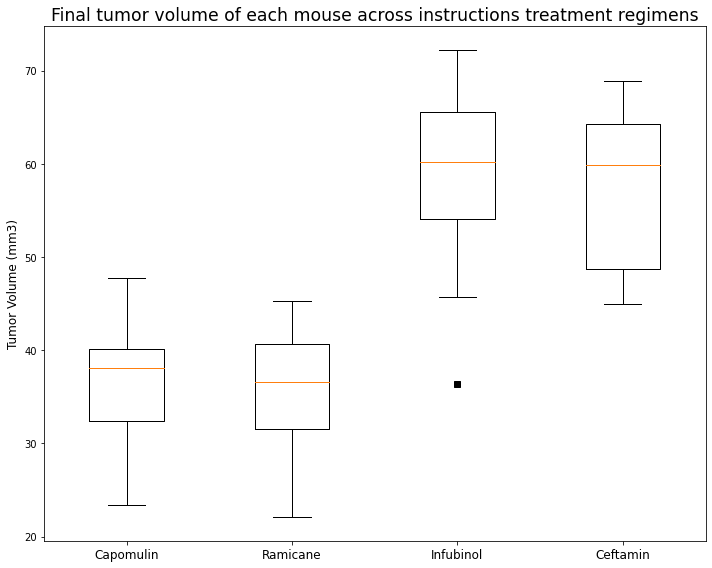

In [21]:
fig7, ax1 = plt.subplots(figsize=(10,8), tight_layout=True)
ax1.set_title('Final tumor volume of each mouse across instructions treatment regimens',fontsize='xx-large')
ax1.boxplot(InstrutionsRegimens, flierprops=square)
ax1.set_ylabel('Tumor Volume (mm3)', fontsize='large')
ax1.set_xticklabels(InstrutionsRegimensName, fontsize='large')
plt.show()

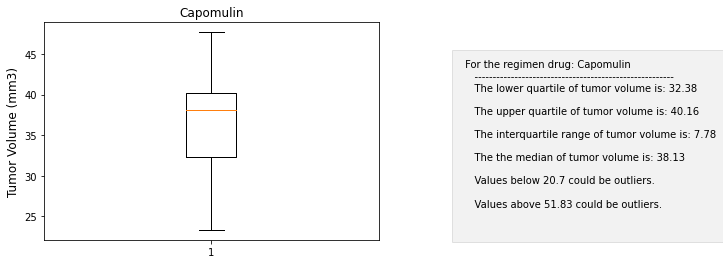


    ------------------------------------------------------------------------------------------------


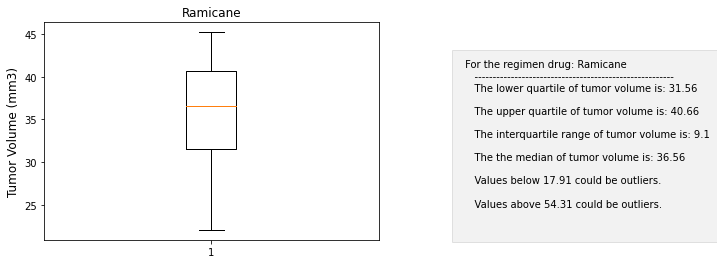


    ------------------------------------------------------------------------------------------------


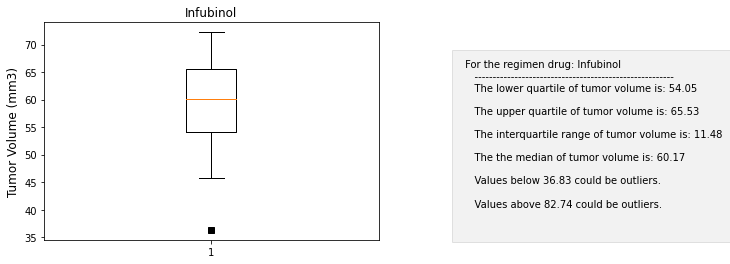


    ------------------------------------------------------------------------------------------------


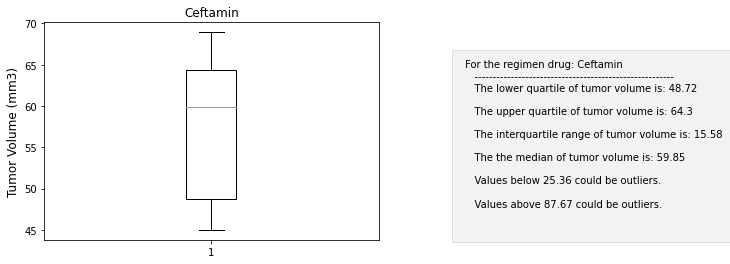


    ------------------------------------------------------------------------------------------------


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in range(len(InstrutionsRegimens)):

    quartiles = InstrutionsRegimens[regimen].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    output=f''' For the regimen drug: {InstrutionsRegimensName[regimen]}
    -------------------------------------------------------
    The lower quartile of tumor volume is: {round(lowerq,2)}
    
    The upper quartile of tumor volume is: {round(upperq,2)}
    
    The interquartile range of tumor volume is: {round(iqr,2)}
    
    The the median of tumor volume is: {round(quartiles[0.5],2)}
    
    Values below {round(lower_bound,2)} could be outliers.
    
    Values above {round(upper_bound,2)} could be outliers.

    '''
    fig , ax=plt.subplots()
    
    ax.set_title(InstrutionsRegimensName[regimen])
    ax.boxplot(InstrutionsRegimens[regimen], flierprops=square, autorange=True )
    ax.set_ylabel('Tumor Volume (mm3)', fontsize='large')

   
    ax.plot()
    ax.text(1.75,InstrutionsRegimens[regimen].min(), output, style='normal',
            bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})

    plt.show()
    print(f'''
    ------------------------------------------------------------------------------------------------''')

In [23]:
#Other: Propousing estimate the most promising treatment regiments with number of mice and tumor volumne (mm3)

LastTimePoint=FramesByTime[-1].groupby(['Drug Regimen']).agg(['count','mean'])['Tumor Volume (mm3)']
FirstTimePoint=FramesByTime[0].groupby(['Drug Regimen']).agg(['count','mean'])['Tumor Volume (mm3)']

ScoreDrugRegimen=pd.merge(LastTimePoint, FirstTimePoint, how='outer', on='Drug Regimen', suffixes=("_Last","_First") )

ScoreDrugRegimen['Score survival of mice']=((ScoreDrugRegimen['count_Last']/ScoreDrugRegimen['count_First'])-1)*100
ScoreDrugRegimen['Score disminution of tumor']=((ScoreDrugRegimen['mean_Last']/ScoreDrugRegimen['mean_First'])-1)*100
ScoreDrugRegimen['Final Score']=(-0.5)*ScoreDrugRegimen['Score disminution of tumor']+(0.5)*ScoreDrugRegimen['Score survival of mice']

ScoreDrugRegimen=ScoreDrugRegimen.sort_values(by=['Final Score'], ascending=False).head(4) #flexible to change or to use all data 


ScoreDrugRegimen 


,count_Last,mean_Last,count_First,mean_First,Score survival of mice,Score disminution of tumor,Final Score
Drug Regimen,,,,,,,
Capomulin,21,36.236114,25,45.0,-16.0,-19.475303,1.737651
Ramicane,20,34.955595,25,45.0,-20.0,-22.320900,1.160450
Ceftamin,13,64.132421,25,45.0,-48.0,42.516492,-45.258246
Zoniferol,14,65.960888,25,45.0,-44.0,46.579751,-45.289875


In [24]:
#Serch only the most promisig treatment regimens acording score

#Set only the index to use FramesByDrug
IndexScore=[]
for drug in ScoreDrugRegimen.index:
    for n in range(len(DrugName)):
        if DrugName[n]==drug:
            IndexScore.append(n)

#Data to plot             
           
PromisingRegimens=[]
PromisingRegimensName=[]
for Int in range(len(IndexScore)):
    LastPoint=pd.DataFrame(FramesByDrug[IndexScore[Int]]).drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False)
    PromisingRegimens.append(LastPoint['Tumor Volume (mm3)'])
    PromisingRegimensName.append(DrugName[IndexScore[Int]])
    

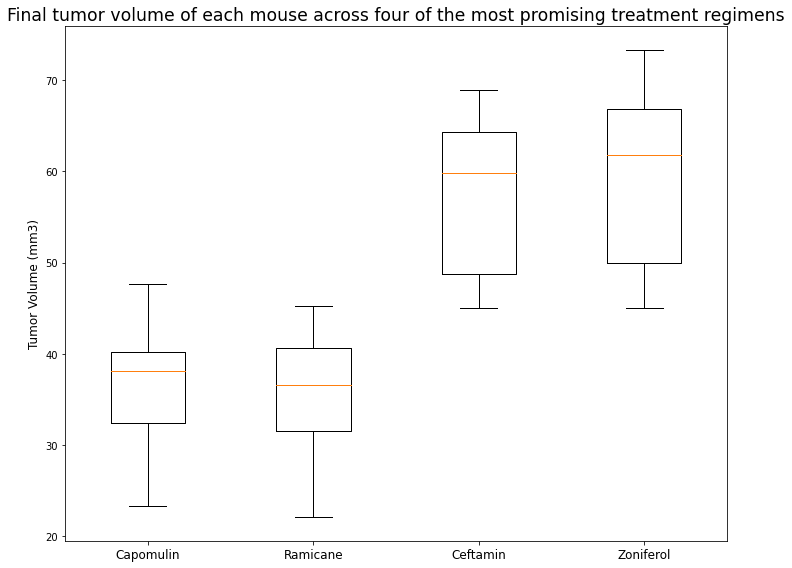

In [25]:
#Instruction to plot

fig8, ax1 = plt.subplots(figsize=(10,8), tight_layout=True)
ax1.set_title('Final tumor volume of each mouse across four of the most promising treatment regimens',fontsize='xx-large')
ax1.boxplot(PromisingRegimens, flierprops=square)
ax1.set_ylabel('Tumor Volume (mm3)', fontsize='large')
ax1.set_xticklabels(PromisingRegimensName, fontsize='large')
plt.show()


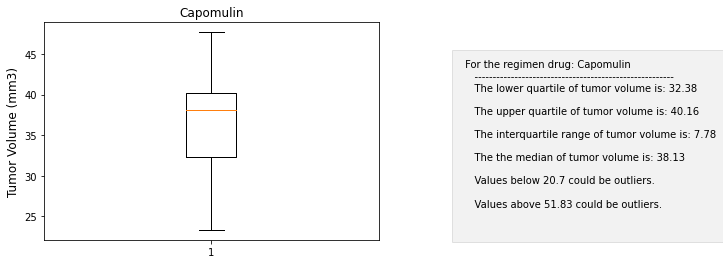


    ------------------------------------------------------------------------------------------------


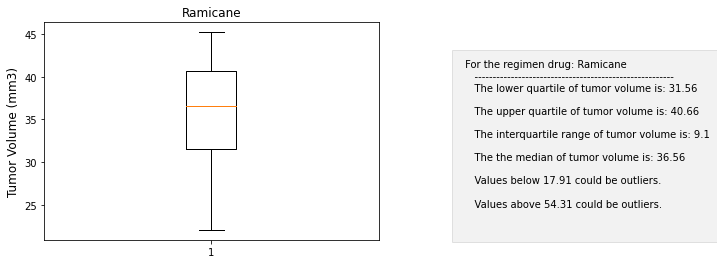


    ------------------------------------------------------------------------------------------------


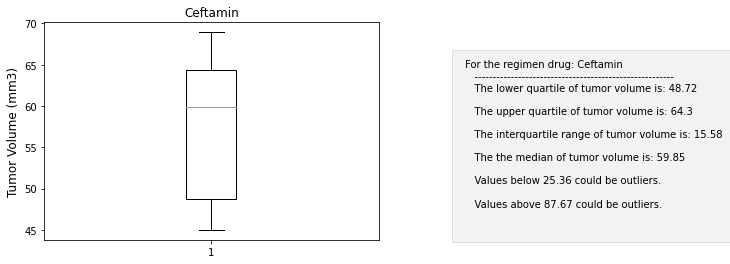


    ------------------------------------------------------------------------------------------------


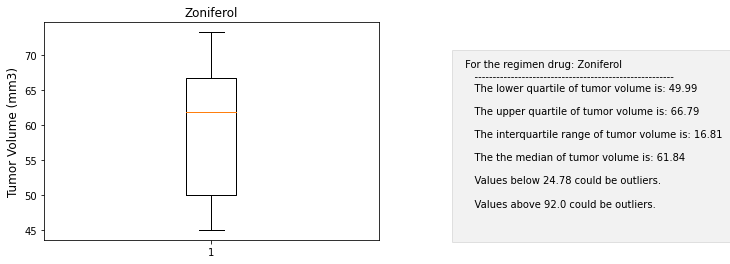


    ------------------------------------------------------------------------------------------------


In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in range(len(PromisingRegimens)):

    quartiles = PromisingRegimens[regimen].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    output=f''' For the regimen drug: {PromisingRegimensName[regimen]}
    -------------------------------------------------------
    The lower quartile of tumor volume is: {round(lowerq,2)}
    
    The upper quartile of tumor volume is: {round(upperq,2)}
    
    The interquartile range of tumor volume is: {round(iqr,2)}
    
    The the median of tumor volume is: {round(quartiles[0.5],2)}
    
    Values below {round(lower_bound,2)} could be outliers.
    
    Values above {round(upper_bound,2)} could be outliers.

    '''
    fig , ax=plt.subplots()
    
    ax.set_title(PromisingRegimensName[regimen])
    ax.boxplot(PromisingRegimens[regimen], flierprops=square, autorange=True )
    ax.set_ylabel('Tumor Volume (mm3)', fontsize='large')

   
    ax.plot()
    ax.text(1.75,PromisingRegimens[regimen].min(), output, style='normal',
            bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})

    plt.show()
    print(f'''
    ------------------------------------------------------------------------------------------------''')

 For box plot of all regimens see Other Plots

## Line and Scatter Plots

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Set Frame of mice in treated with the drug of interest

Frame=FramesByDrug[1]
MiceInDrugOfInterest=[mouse for mouse in Frame['Mouse ID'].unique()]

FramesInDrugOfInterest=[]
for mouse in MiceInDrugOfInterest:
    FramesInDrugOfInterest.append(FramesByDrug[1].loc[lambda Frame:Frame['Mouse ID']==mouse])


name=FramesInDrugOfInterest[0]['Mouse ID'].unique()


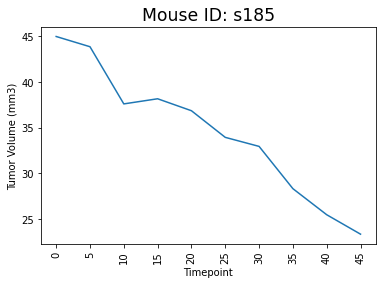

In [28]:
#Plot only one mouse in Drug of Interest
plt.plot(TimePoint,FramesInDrugOfInterest[0]['Tumor Volume (mm3)'])
plt.title(f'Mouse ID: {name[0]}', fontsize='xx-large')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xticks(TimePoint, rotation='vertical')
plt.show()


In Other Plots is show the group of interest each mouse tumor volume evolution

In [29]:
#Create the series to the scatter plot

WeigthAveMouse=[]
TumorAveMouse=[]
Mouse=[]

for mouse in range(len(MiceInDrugOfInterest)):
    WeigthAveMouse.append(FramesInDrugOfInterest[mouse]['Weight (g)'].mean())
    TumorAveMouse.append(FramesInDrugOfInterest[mouse]['Tumor Volume (mm3)'].mean())
    Mouse.append(MiceInDrugOfInterest[mouse])

ScatterDrugInterest=pd.DataFrame({
    'Mouse ID':Mouse,
    'Ave Weigth (g)':WeigthAveMouse,
    'Ave Tumor Volume (mm3)':TumorAveMouse
}, index=[Mouse])
    
   
    

## Correlation and Regression

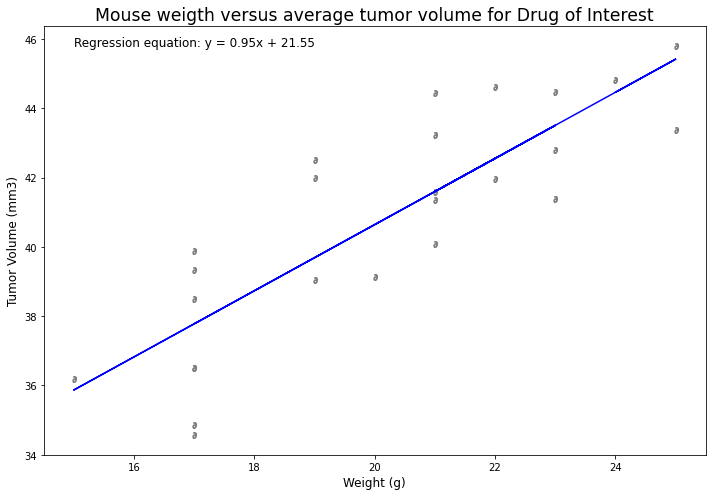

The correlation between Mouse weigth and averange tumor volume is 0.84


In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
 
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot

x_values = ScatterDrugInterest['Ave Weigth (g)']
y_values = ScatterDrugInterest['Ave Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

#Plot
fig9=plt.figure(figsize=(10,7), tight_layout=True)
plt.scatter(x_values,y_values, s=None, c='grey', marker=r'$\partial$',
            label="Mouse")
plt.plot(x_values,regress_values,color="blue")
plt.title('Mouse weigth versus average tumor volume for Drug of Interest', fontsize='xx-large')
plt.xlabel('Weight (g)', fontsize='large')
plt.annotate(f'Regression equation: {line_eq}',(x_values.min(),y_values.max()),fontsize='large',color="black")
plt.ylabel('Tumor Volume (mm3)', fontsize='large')
plt.show()

print(f"The correlation between Mouse weigth and averange tumor volume is {round(correlation[0],2)}")



# Others plots

### Box Plot final tumor volume of each mouse of all regimens

In [31]:
# Generate a box plot of the final tumor volume of each mouse across all regimen
BoxPlotData=[]
BoxPlotlabels=[]
for drug in range(len(DrugName)):
    LastPoint=pd.DataFrame(FramesByDrug[drug]).drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False)
    BoxPlotData.append(LastPoint['Tumor Volume (mm3)'])
    BoxPlotlabels.append(DrugName[drug]) 

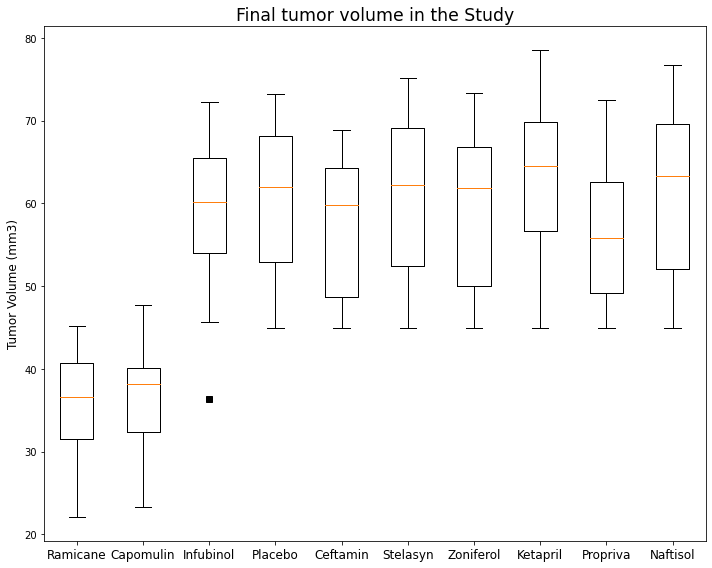

In [32]:
fig10, ax1 = plt.subplots(figsize=(10,8), tight_layout=True)
ax1.set_title('Final tumor volume in the Study',fontsize='xx-large')
ax1.boxplot(BoxPlotData, flierprops=square)
ax1.set_ylabel('Tumor Volume (mm3)', fontsize='large')
ax1.set_xticklabels(BoxPlotlabels, fontsize='large')
plt.show()

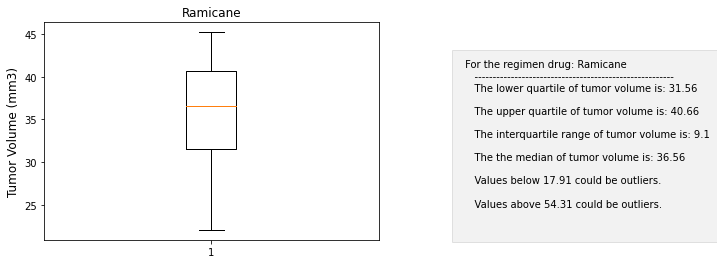


    ------------------------------------------------------------------------------------------------


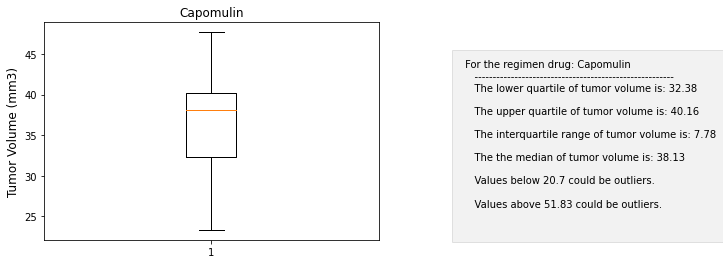


    ------------------------------------------------------------------------------------------------


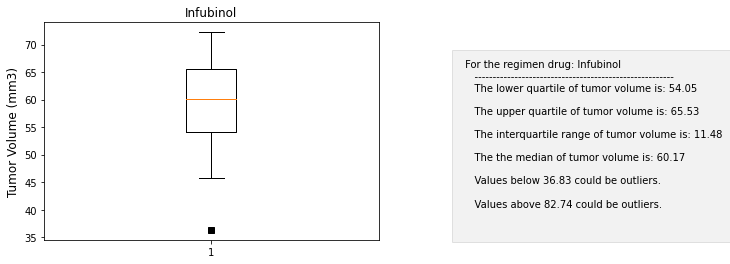


    ------------------------------------------------------------------------------------------------


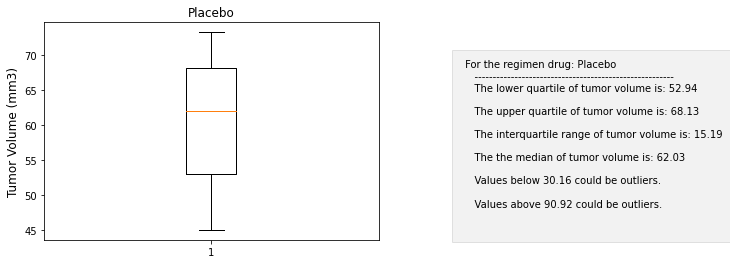


    ------------------------------------------------------------------------------------------------


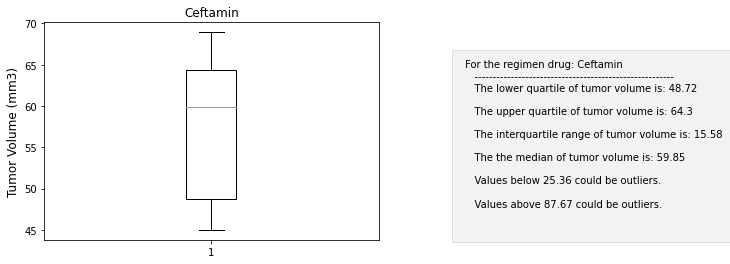


    ------------------------------------------------------------------------------------------------


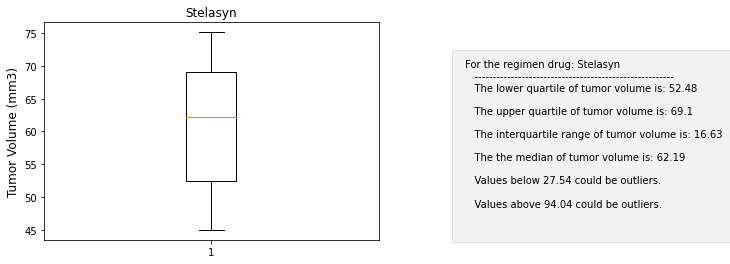


    ------------------------------------------------------------------------------------------------


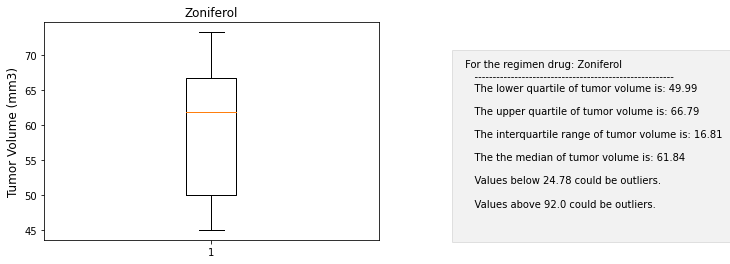


    ------------------------------------------------------------------------------------------------


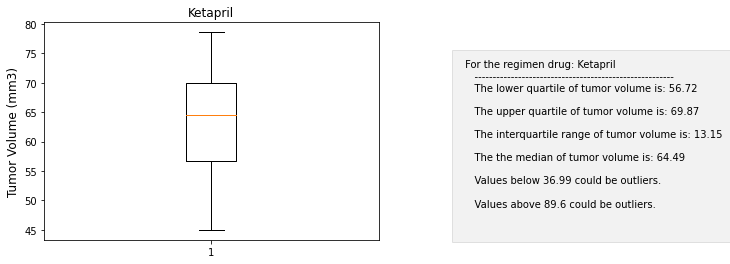


    ------------------------------------------------------------------------------------------------


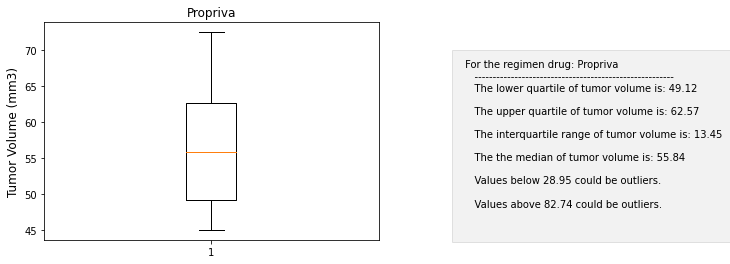


    ------------------------------------------------------------------------------------------------


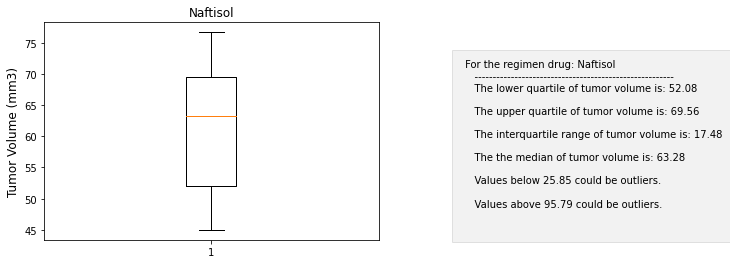


    ------------------------------------------------------------------------------------------------


In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in range(len(BoxPlotData)):

    quartiles = BoxPlotData[regimen].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    output=f''' For the regimen drug: {BoxPlotlabels[regimen]}
    -------------------------------------------------------
    The lower quartile of tumor volume is: {round(lowerq,2)}
    
    The upper quartile of tumor volume is: {round(upperq,2)}
    
    The interquartile range of tumor volume is: {round(iqr,2)}
    
    The the median of tumor volume is: {round(quartiles[0.5],2)}
    
    Values below {round(lower_bound,2)} could be outliers.
    
    Values above {round(upper_bound,2)} could be outliers.

    '''
    fig , ax=plt.subplots()
    
    ax.set_title(BoxPlotlabels[regimen])
    ax.boxplot(BoxPlotData[regimen], flierprops=square, autorange=True )
    ax.set_ylabel('Tumor Volume (mm3)', fontsize='large')
    ax.plot()
    ax.text(1.75,BoxPlotData[regimen].min(), output, style='normal',
            bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})

    plt.show()
    print(f'''
    ------------------------------------------------------------------------------------------------''')

### Multiple plot of mice in group of interest

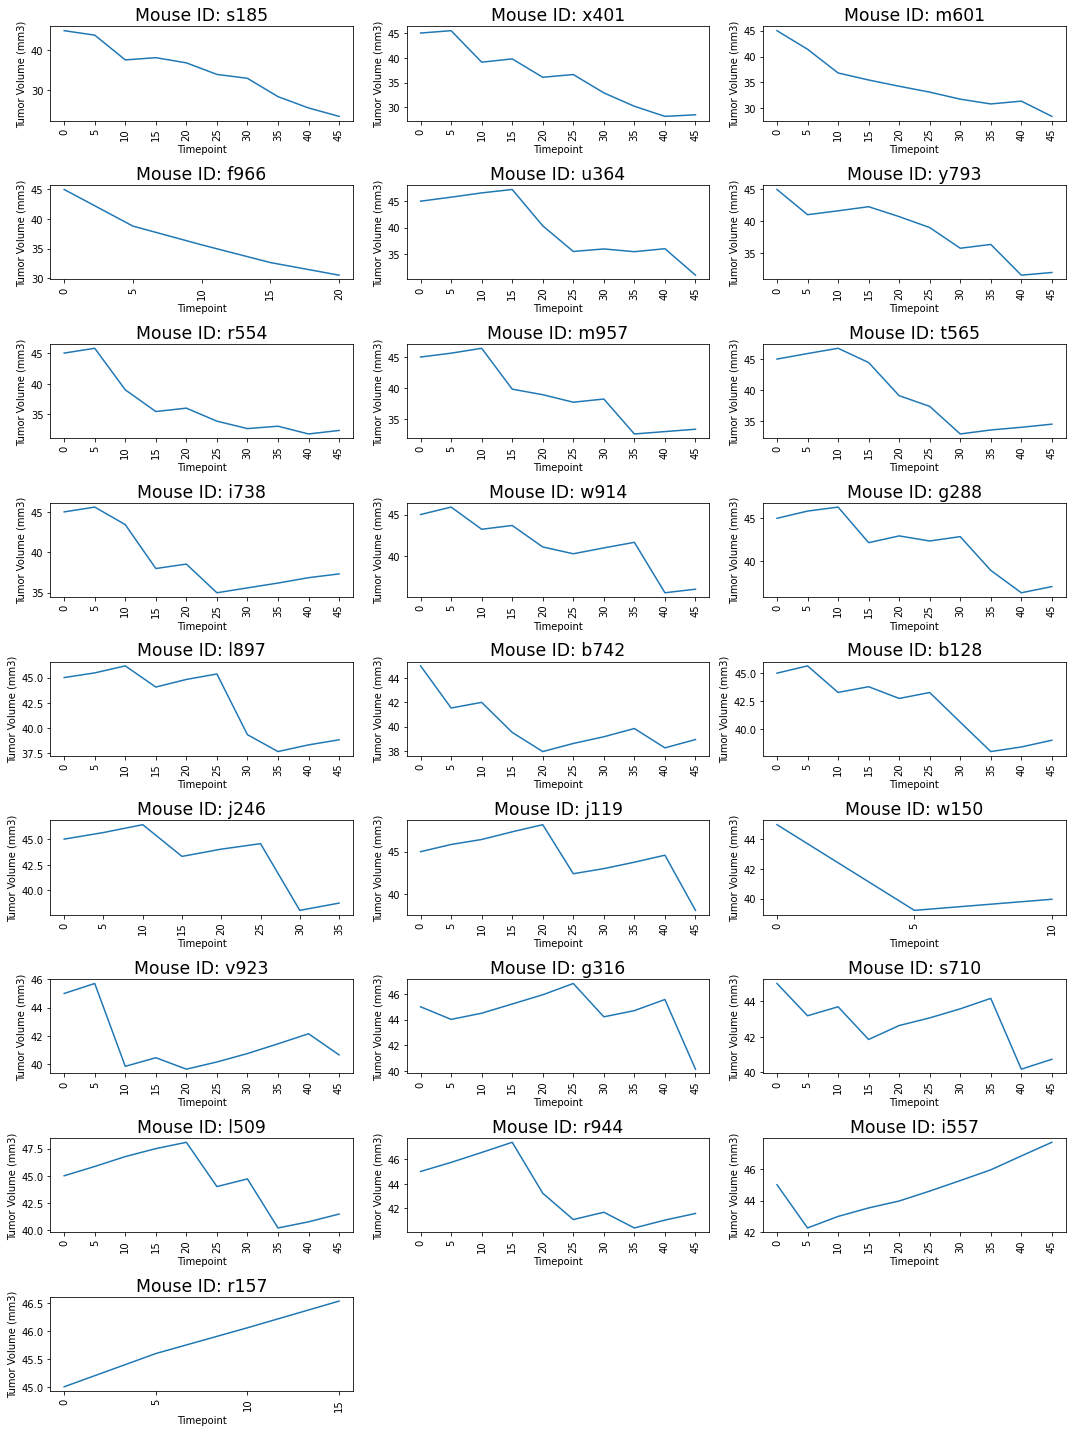

In [34]:
#Show the evolution of each mice in the group of interest

figf=plt.figure(figsize=(15,20), tight_layout=True)

for m in range(len(MiceInDrugOfInterest)):
    y=FramesInDrugOfInterest[m]['Tumor Volume (mm3)']
    x=[TimePoint[i] for i in range(len(y))]
    figf.add_subplot(9,3,m+1)
    plt.plot(x,y)
    plt.title(f'Mouse ID: {MiceInDrugOfInterest[m]}', fontsize='xx-large')
   
    plt.xticks(x, rotation='vertical')
    plt.ylabel('Tumor Volume (mm3)')
    plt.xlabel('Timepoint')
   
plt.show()